In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('us-counties.csv')

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df_latestdate = df[df.groupby('county').date.transform('max') == df['date']]

df_state = df_latestdate.groupby('state').agg({
    'cases':'sum',
    'deaths':'sum',
})

df_state

,cases,deaths
state,,
Alabama,134417,2285
Alaska,6735,39
Arizona,206548,5253
Arkansas,66406,928
California,749196,13990
Colorado,60291,1984
Connecticut,53871,4474
Delaware,18308,609
District of Columbia,14387,615


In [ ]:
df_state = df_state.sort_values(by = 'cases', ascending = False)

df_date = df.set_index('date')
df_state_ten = df_state.head(15).iloc[::-1]
df_state_ten_copy = df_state_ten.copy(deep =True)

df_state_ten_copy['fatality rate'] = (df_state_ten_copy['deaths']/df_state_ten_copy['cases'])*100

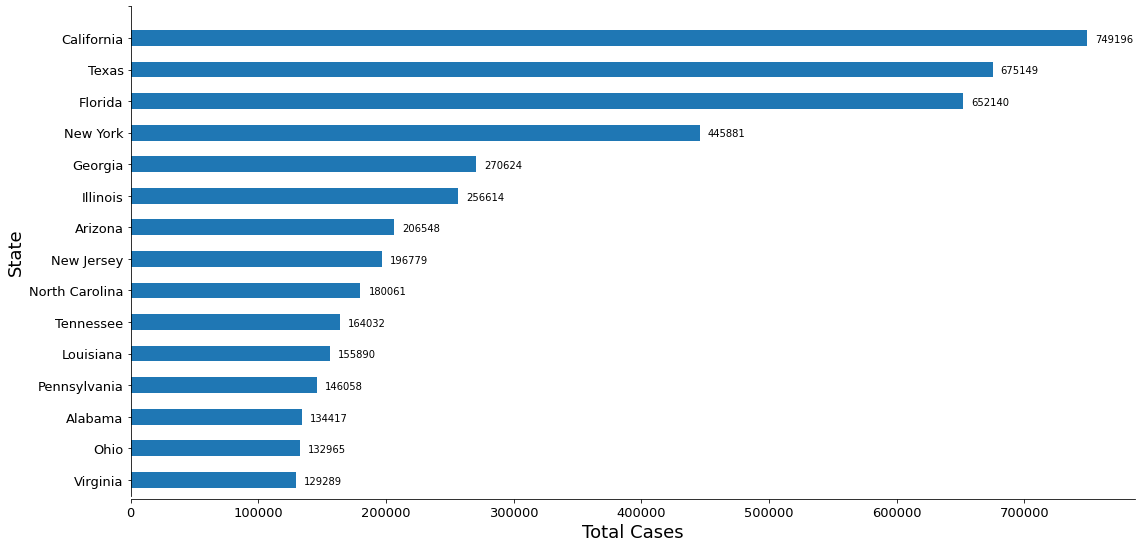

In [ ]:
my_range=list(range(len(df_state_ten.index)+1))
fig, ax = plt.subplots(figsize=(18,9))
df_state_ten['cases'].plot(kind ='barh')


ax.set_xlabel('Total Cases', fontsize=18,)
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylabel('State', fontsize=18)
plt.yticks(my_range, df_state_ten.index)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data', -.6))

for x,y in zip(my_range,df_state_ten["cases"]):
    label = "{:}".format(y)
    plt.annotate(label, 
                 (y,x), 
                  textcoords="offset points",
                 xytext=(27,-6), 
                 ha='center',va="bottom")    